In [16]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

%matplotlib inline 

In [2]:
df = pd.read_csv('./input/us_acc.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [3]:
print(f'Rows: {df.shape[0]}\nColumns: {df.shape[1]}')

Rows: 1516064
Columns: 47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [6]:
df.isna().mean().sort_values(ascending=False)

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
Sunrise_Sunset           0.000055
Civil_Twilight           0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
City                     0.000055
Country                  0.000000
Give_Way                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Turning_Loop             0.000000
Traffic_Signal           0.000000
Traffic_Calming          0.000000
Stop                     0.000000
Station                  0.000000
Roundabout    

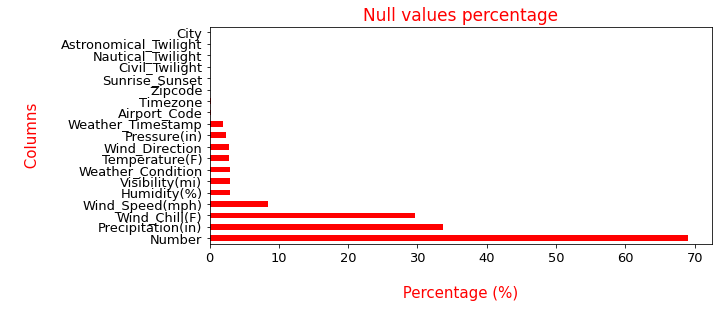

In [9]:
a = (df.isna().sum().sort_values(ascending=False) / len(df)) * 100
plt.figure(figsize=(9,4))
plt.title('Null values percentage', size=17, color='red')
plt.xlabel('\n Percentage (%) \n', fontsize=15, color='red')
plt.ylabel('\n Columns \n', fontsize=15, color='red')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
a[a != 0].plot(kind='barh', color='red')
plt.show()

In [10]:
df = df.drop('Number', axis=1)

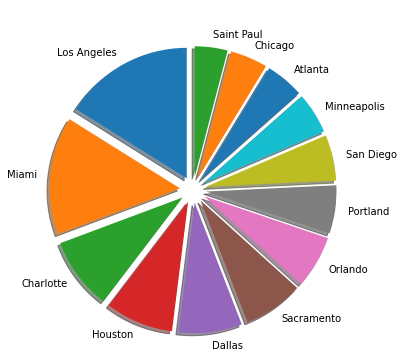

In [12]:
a = df.City.value_counts()
plt.figure(figsize=(10,6))
plt.title('Cities accident cases', size=17, color='white')
lab = a[a > 10000].index
plt.pie(a[a > 10000], shadow=True, explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1), startangle=90, labels=lab)
plt.show()

In [13]:
largest_acc_city = a[0]
largest_acc_city / 5 

7996.8

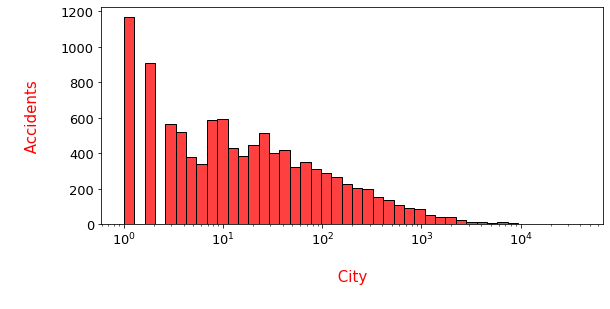

In [14]:
plt.figure(figsize=(9,4))
plt.xlabel('\n City \n', fontsize=15, color='red')
plt.ylabel('\n Accidents \n', fontsize=15, color='red')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.histplot(df.City.value_counts(), log_scale=True, color='red')
plt.show()

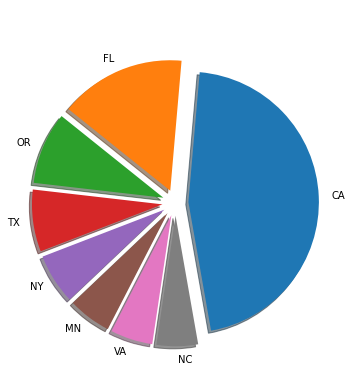

In [15]:
b = df.State.value_counts()
plt.figure(figsize=(10,6))
plt.title('US states accidents cases', size=17, y=1.04, color='white')
lab = b[b > 50000].index
plt.pie(b[b > 50000], shadow=True, explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1), startangle=280, labels=lab)
plt.show()

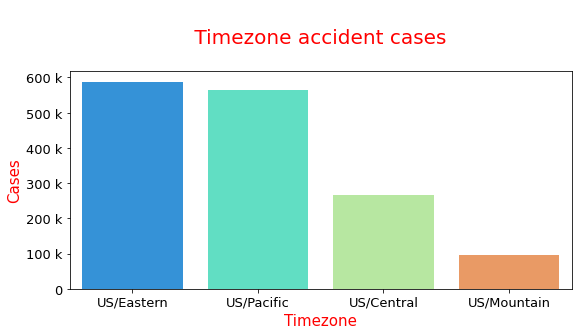

In [17]:
timezone = pd.DataFrame(df.Timezone.value_counts()).reset_index().rename(columns={'index':'Timezone', 'Timezone':'Cases'})
plt.figure(figsize=(9,4))
plt.title('\n Timezone accident cases \n', size=20, color='red')
plt.xlabel('\n Timezone \n', fontsize=15, color='red')
plt.ylabel('\n Accidents \n', fontsize=15, color='red')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
a = sns.barplot(x=timezone.Timezone, y=timezone.Cases, palette='rainbow')
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [19]:
for (i,j) in zip(timezone.Timezone, range(0,4)):
    print("Percentage of accident cases reported in {} is {:.2f}%".format(i,(df.Timezone.value_counts()[j]/(df.Timezone.value_counts()[0] +
          df.Timezone.value_counts()[1] + df.Timezone.value_counts()[2] + df.Timezone.value_counts()[3]))*100))

Percentage of accident cases reported in US/Eastern is 38.84%
Percentage of accident cases reported in US/Pacific is 37.28%
Percentage of accident cases reported in US/Central is 17.52%
Percentage of accident cases reported in US/Mountain is 6.36%


In [ ]:
street = 